In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class dataset_stats():
    def __init__(self,dataset):
        ''' 
        args:
            dataset:path of a npy file,containing a dict, arranged in form:
                {'train_list':<a dataframe>,
                'val_list':<a dataframe>,
                'test_list':<a dataframe>
                },
            formed in dataset segmentation.ipynb
        '''
        data = np.load(dataset,allow_pickle=True).item()

        self.training = data['train_list']
        self.val = data['val_list']
        self.testing = data['test_list']

        self.training_count = self.__get_patches_count(self.training)
        self.val_count = self.__get_patches_count(self.val)
        self.testing_count = self.__get_patches_count(self.testing)
    
    def __get_patches_count(self,data):
        '''
        args:
            data:['self.training','self.val','self.testing']
        returns:
            a list of patches count in each list
        '''
        return data.iloc[:,2]

    def __get_patches_count_with_label(self,data):
        H_count = data[data['TMB_H/L']=='H'].iloc[:,2]
        L_count = data[data['TMB_H/L']=='L'].iloc[:,2]
        return H_count,L_count
    
    def view_continuous(self,xlim:bool = False,figsize = (10,3)):
        '''
        args:
            xlim:if set right border of the x-axis,for better comparision,determined by max_count among all three datasets 
        returns:
            None
        '''
        kwargs = {
            "bins": 20,
            "histtype": "stepfilled",
            "alpha": 0.5
            }
        fig,axes = plt.subplots(1,3,figsize = figsize)
        plt.style.use('ggplot')
        max_count = max(self.training_count.max(),self.val_count.max(),self.testing_count.max())
        for i,data_count in enumerate([self.__get_patches_count_with_label(i) for i in [self.training,self.val,self.testing]]):
            axes[i].hist(data_count[0],label='H',**kwargs)
            axes[i].hist(data_count[1],label='L',**kwargs)
            axes[i].set_xlabel('patch_number')
            axes[i].set_ylabel('count')
            if xlim:
                axes[i].set_xlim(0,max_count)
            axes[i].legend()
        for i,title in enumerate(['training','val','testing']):
            axes[i].set_title(title)
        plt.show()

    def __convert_proportions(self,series:pd.Series,bins):
        '''
        args:
            series:series of patches count of H/L patient in different dataset
            bins:generated by max_count & number of parts that we want to generate
        returns:
            a series,numbers of patients in different range of patch count
        aims:
            to demonstate that median of patch_count in H/L group is approximately equal, that we can set an 
        '''
        segment = pd.cut(series,bins=bins,labels=range(len(bins)-1)).value_counts()
        proportions = segment / segment.sum()
        return proportions  #label patients according to diffenrent level of patch count


    def view_proportion(self,bin_num,figsize):
        '''
        args:
            bin_num:
        returns:
            draw a grouped bar plot based on proportion of patch_count groups
        '''
        fig,axes = plt.subplots(1,3,figsize = figsize)
        fig.suptitle('Proportion of patient with different patch_counts')
        plt.style.use('ggplot')
        max_count = max(self.training_count.max(),self.val_count.max(),self.testing_count.max())  #get max patch count in the whole dataset under specific magnification scale, based on which we seperate patients into diffenrent parts
        for i,data_count in enumerate([self.__get_patches_count_with_label(i) for i in [self.training,self.val,self.testing]]):
            bins = np.linspace(0,max_count,bin_num) #generate bins for seperating patients according to their patch count
            H_proportions = self.__convert_proportions(data_count[0],bins) 
            L_proportions = self.__convert_proportions(data_count[1],bins)
            df = pd.DataFrame({
                'H':H_proportions,
                'L':L_proportions
            })  #wrap data in a df for convient extraction & drawing
            base = np.array([0,0]) # base values for bottom in stacked barplot
            x = ['H','L'] # labels of x-axis
            for row in range(df.shape[0]):
                axes[i].bar(x,df.iloc[row,:],bottom=base,label = f'seg{row+1}',width = 0.5) #labels here represent legend in figure. the larger i, the smaller range of patch count
                base = base + df.iloc[row,:]
            axes[i].axhline(y = 0.5,color = 'red',linestyle = '--') # reference line
            axes[i].set_xlabel('level of TMB')
            axes[i].set_ylabel('proportion')
            axes[i].set_ylim(0,1.1)
            axes[i].legend()
        for i,title in enumerate(['training','val','testing']):
            axes[i].set_title(title)
        plt.show()

    def __getattribute__(self, name: str):
        return object.__getattribute__(self,name)
    
    def get(self,*args):
        return self.__get_patches_count_with_label(*args)

In [3]:
dataset_5x = dataset_stats('../config/data_segmentation_csv/5X_grouping.npy')
dataset_10x = dataset_stats('../config/data_segmentation_csv/10X_grouping.npy')
dataset_20x = dataset_stats('../config/data_segmentation_csv/20X_grouping.npy')
dataset_40x = dataset_stats('../config/data_segmentation_csv/40X_grouping.npy')

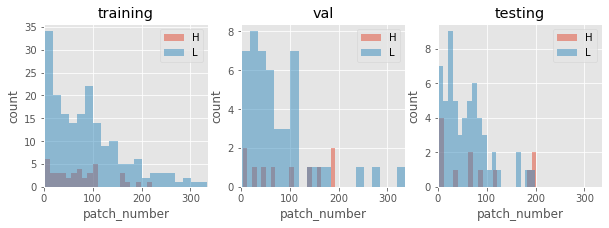

In [9]:
dataset_5x.view_continuous(xlim=True)

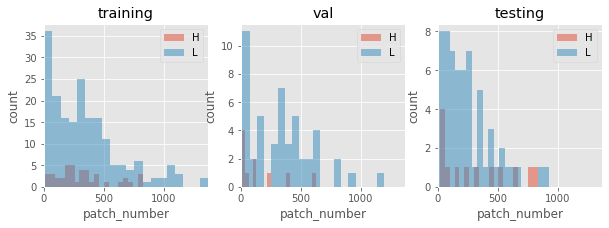

In [5]:
dataset_10x.view_continuous(xlim=True)

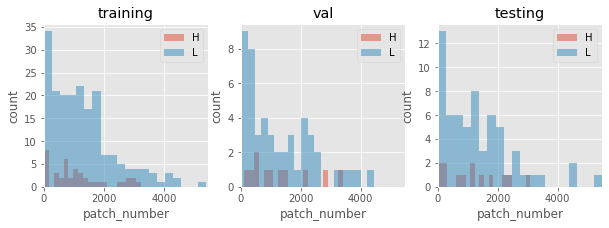

In [6]:
dataset_20x.view_continuous(xlim=True)

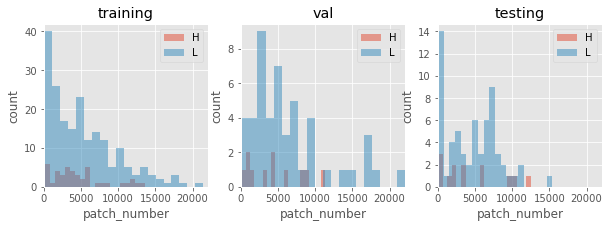

In [7]:
dataset_40x.view_continuous(xlim=True)

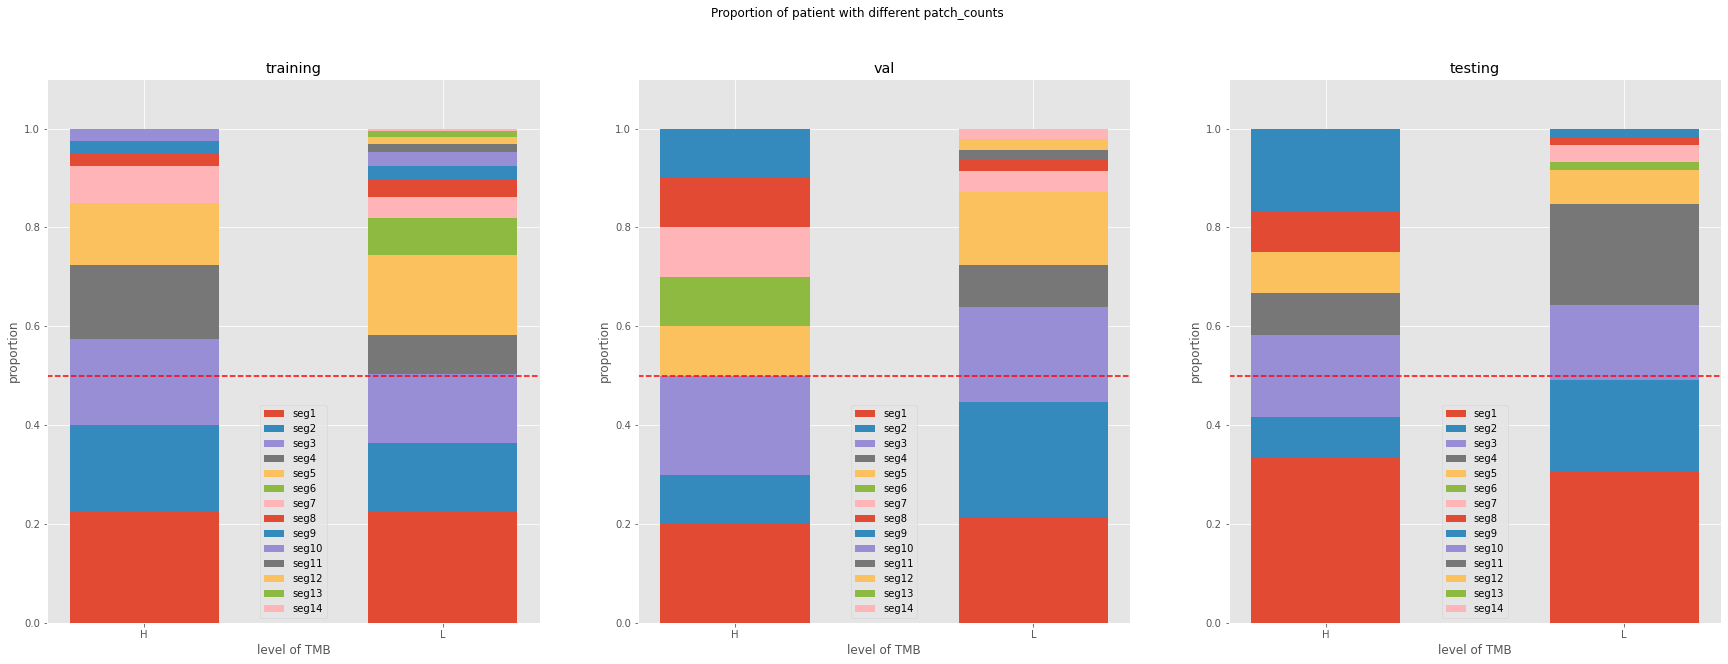

In [8]:
dataset_5x.view_proportion(bin_num=15,figsize = (30,10))

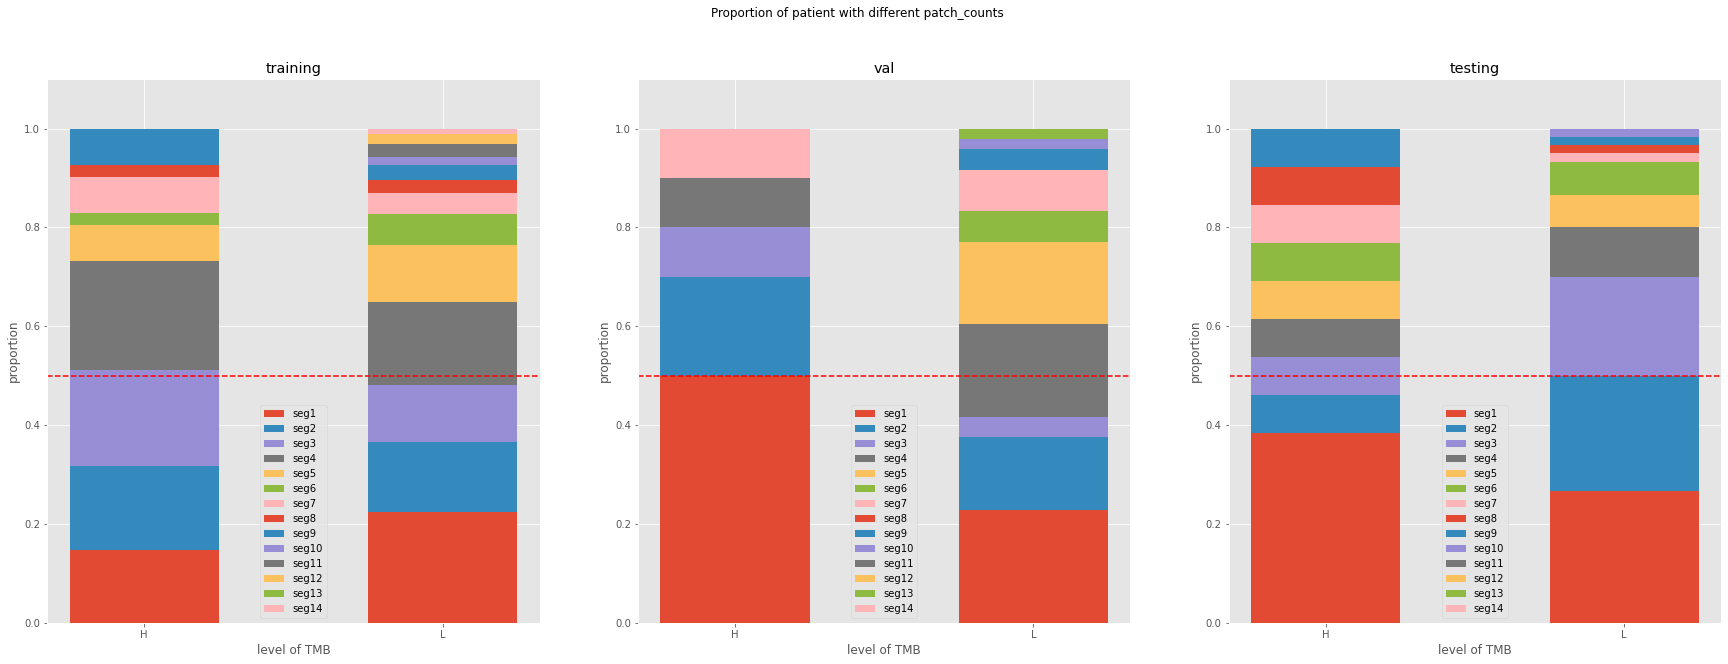

In [10]:
dataset_10x.view_proportion(bin_num=15,figsize = (30,10))

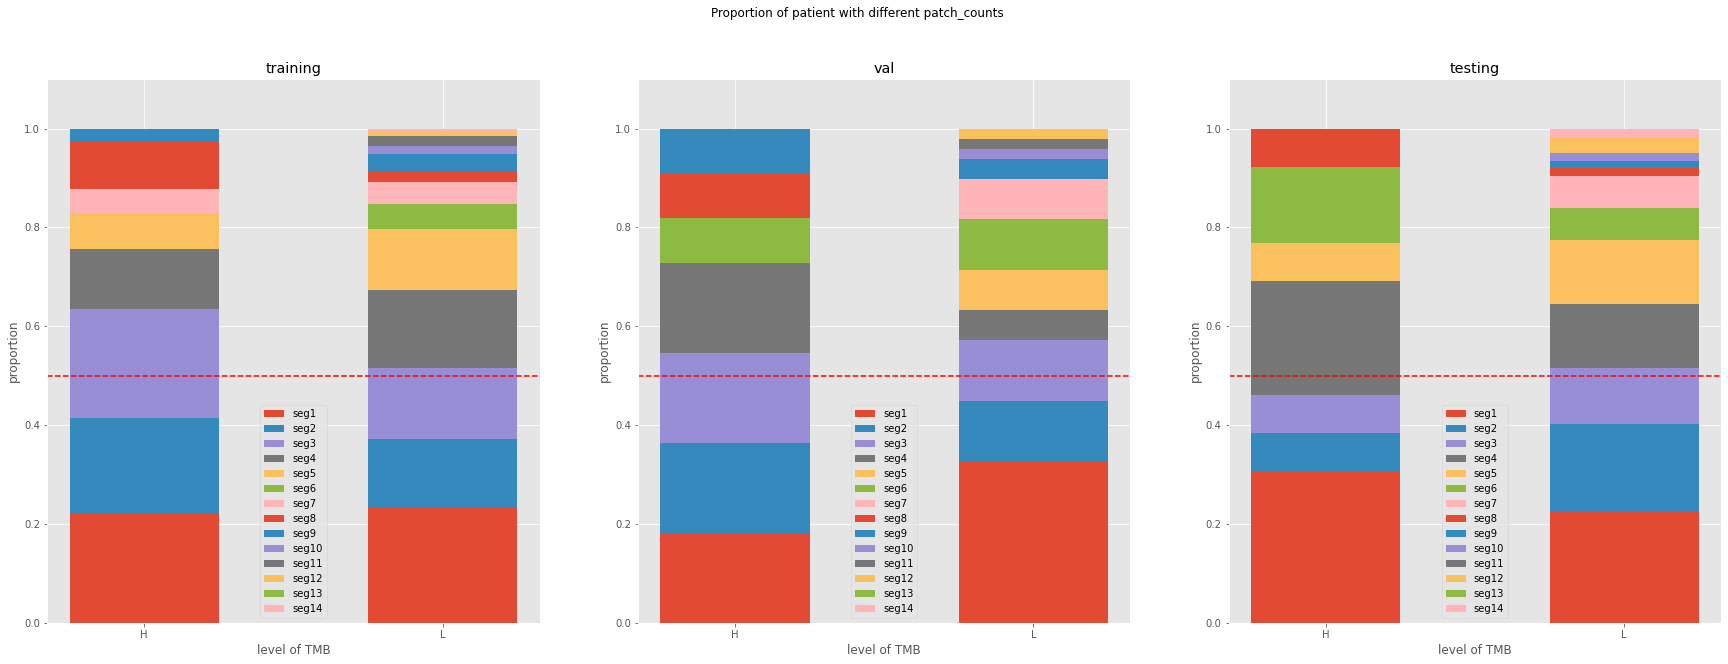

In [11]:
dataset_20x.view_proportion(bin_num=15,figsize = (30,10))

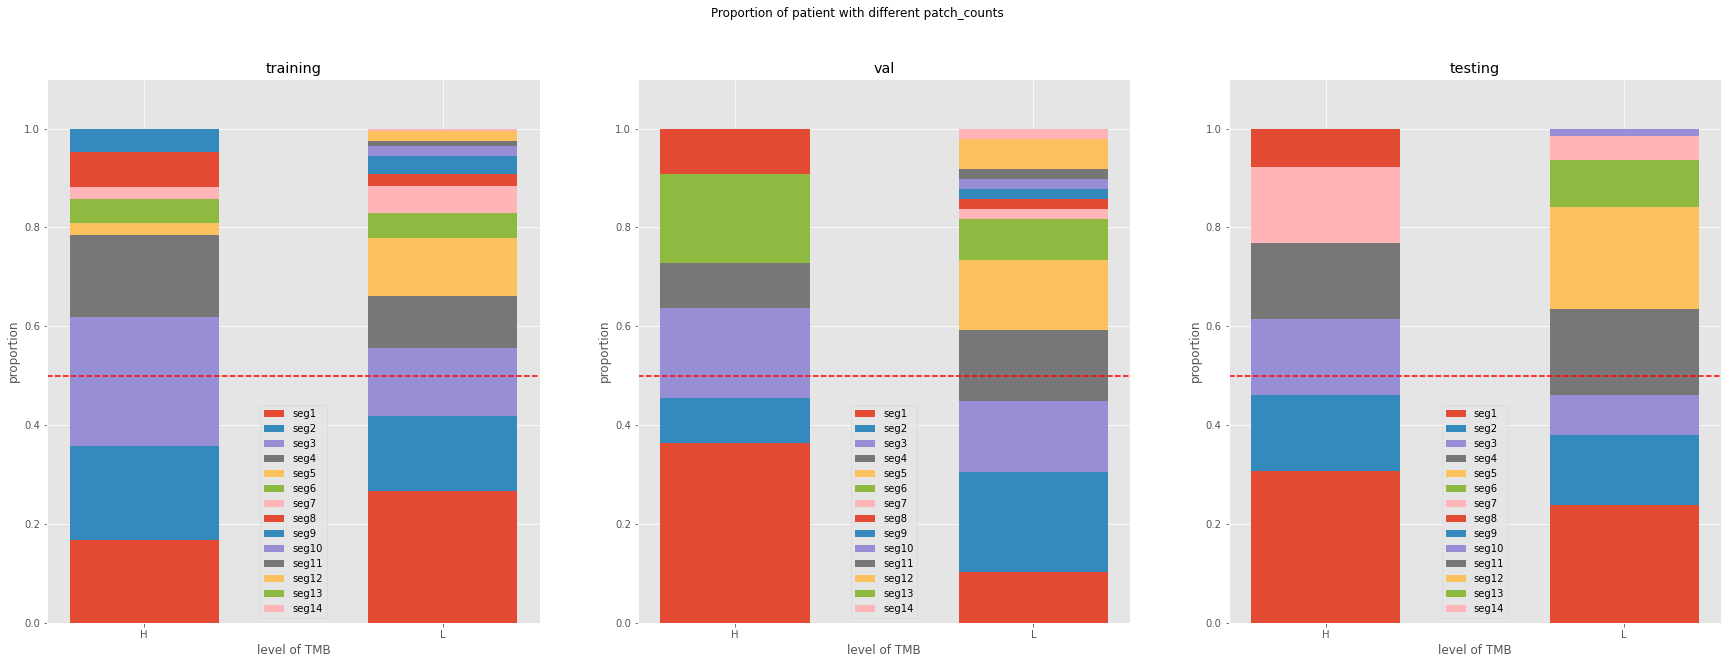

In [12]:
dataset_40x.view_proportion(bin_num=15,figsize = (30,10))

In [ ]:
print(dataset_5x.__get_patches_with_label)